In [1]:
from deap import base
from deap import creator
from deap import tools
from deap import base, algorithms
import random
import numpy as np
import matplotlib.pyplot as plt 

In [2]:
ONE_MAX_LENGTH = 100 # размер списка, с которым работает ГА
POPULATION_SIZE = 200 # размер популяции
P_CROSSOVER = 0.9
P_MUTATION = 0.1
MAX_GENERATIONS = 50
# creator.create("Point", object, MAX_COORD = 10, MIN_COORD = 0, coords=list)

# pt = creator.Point()
creator.create("FitnessMax", base.Fitness, weights = (1.0, ))
creator.create("Individual", list, fitness = creator.FitnessMax)

def oneMaxFitness(individual):
    return sum(individual), # кортеж

toolbox = base.Toolbox()
toolbox.register("randRange", random.randint, 0, 1)
toolbox.register("individualCreator", tools.initRepeat, creator.Individual, toolbox.randRange, ONE_MAX_LENGTH)
toolbox.register("populationCreator", tools.initRepeat, list, toolbox.individualCreator)

population = toolbox.populationCreator(n=POPULATION_SIZE)

In [3]:
toolbox.register("select", tools.selTournament, tournsize=3)
toolbox.register("mate", tools.cxOnePoint)
toolbox.register("mutate", tools.mutFlipBit, indpb=1.0/ONE_MAX_LENGTH)
toolbox.register("evaluate", oneMaxFitness)

In [4]:
stats = tools.Statistics(lambda ind: ind.fitness.values)
stats.register("max", np.max)
stats.register("avg", np.mean)

population, logbook = algorithms.eaSimple(population, toolbox,
                                        cxpb=P_CROSSOVER,
                                        mutpb=P_MUTATION,
                                        ngen=MAX_GENERATIONS,
                                        stats=stats,
                                        verbose=True)
maxFitnessValues, meanFitnessValues = logbook.select("max", "avg")

gen	nevals	max 	avg    
0  	200   	5828	5071.37
1  	185   	5989	5319.78
2  	191   	6182	5530.67
3  	182   	6332	5694.06
4  	183   	6281	5846.23
5  	186   	6389	6005.98
6  	189   	6565	6134.41
7  	183   	6691	6238.02
8  	178   	6715	6335.54
9  	182   	6732	6464.54
10 	190   	6848	6554.14
11 	178   	6930	6650.57
12 	187   	7000	6739.5 
13 	182   	7071	6802.66
14 	189   	7143	6870.16
15 	187   	7143	6939.06
16 	189   	7213	6994.68
17 	175   	7233	7051.31
18 	174   	7245	7100.34
19 	176   	7300	7145.57
20 	181   	7341	7189.12
21 	190   	7349	7230.41
22 	186   	7384	7266.81
23 	182   	7422	7302.84
24 	180   	7425	7331.06
25 	181   	7464	7355.31
26 	186   	7497	7377.23
27 	188   	7537	7406.52
28 	181   	7552	7435.84
29 	186   	7644	7460.69
30 	177   	7623	7496.33
31 	186   	7633	7522.82
32 	188   	7644	7557.32
33 	170   	7668	7578.73
34 	186   	7674	7605.73
35 	191   	7698	7627.8 
36 	176   	7714	7649.82
37 	179   	7717	7662.18
38 	176   	7728	7676.32
39 	182   	7739	7694.22
40 	186   	7742	

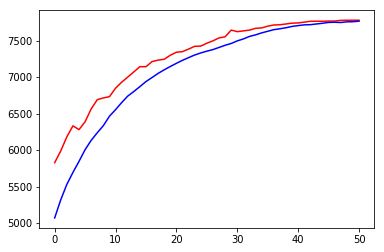

In [5]:
x = np.arange(0, len(maxFitnessValues), 1)

plt.plot(maxFitnessValues, 'r')
plt.plot(meanFitnessValues, 'b')

# plt.xlabel('Поколение')
# plt.ylabel('Макс/средняя приспособленность')
# plt.title('Зависимость максимальной и средней приспособленности от поколения')
plt.show()

In [10]:
import math
class Point():
    def __init__(self, x, y):
        self.x = x
        self.y = y

def angleInterVector(P1, P2):
    return P1.x * P2.x + P1.y * P2.y

p1 = Point(-5,-1)
def angleVector(P1):
    moduleP = math.sqrt(P1.x * P1.x + P1.y * P1.y)
    cos = P1.x / moduleP
    sin = P1.y / moduleP
    angle = math.acos(cos)
    if sin < 0:
        angle *= -1
    return angle / math.pi * 180

# print( angleInterVector(p1, p2) )
print(angleVector(p1))



-168.690067526


In [4]:
import numpy as np
listBit = [1,1,1,1,0,0,0,0,1,1,1,1]
n = 4
listByte = np.zeros(3)

for i in range(3):
    listByte[i] = 0

    for j in range(n):
        listByte[i] += listBit[j + i * n] * (2 ** j)

print(listByte)

[15.  0. 15.]
